In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('data/climate_change_and_conservative_subreddit_comments_vectorized.csv')
data


,ability,able,abruptly,absolutely,accelerating,according,account,accurate,acidification,act,...,written,wrong,wtf,www,yea,yeah,year,yec,yes,label
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,climatechange
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,climatechange
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,climatechange
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,climatechange
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,climatechange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,conservative
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative


Silhouette Score: 0.5633491020699545


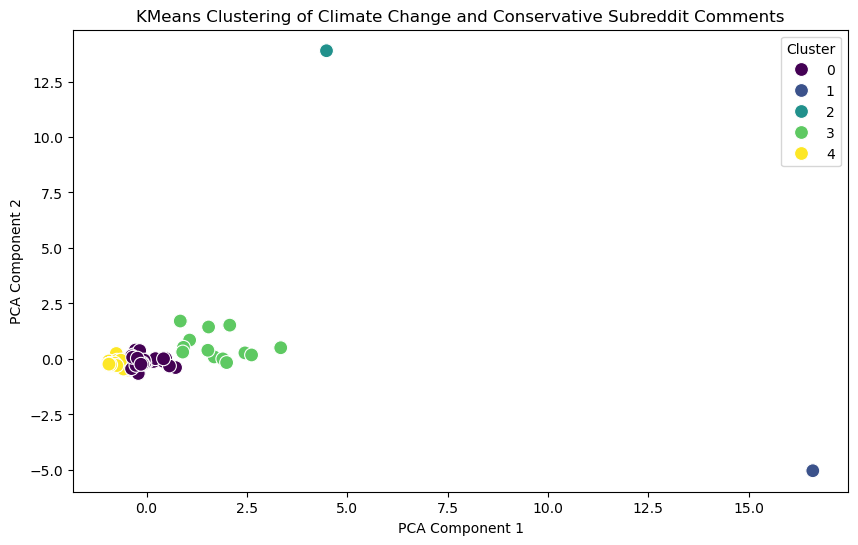

PCA Variance Ration
[0.12379538 0.07582681]
Top 10 features based on ANOVA F-value:
Index(['thinking', 'transparent', 'truely', 'utility', 'viable', 'visible',
       'wanted', 'wildlife', 'wind', 'wing'],
      dtype='object')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Top 10 features based on mutual information:
     feature  mutual_info
139   change     0.547829
158  climate     0.465666
317   energy     0.232641
418    human     0.216884
516      lot     0.204252
295    earth     0.183279
261    didnt     0.170726
512     look     0.166145
911     true     0.163951
647  plastic     0.147841


/var/folders/0m/dnl9zvc16c54thvr_c4qqrt40000gn/T/ipykernel_5261/328846329.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mutual_info', y='feature', data=top_10_mutual_info, palette='viridis')


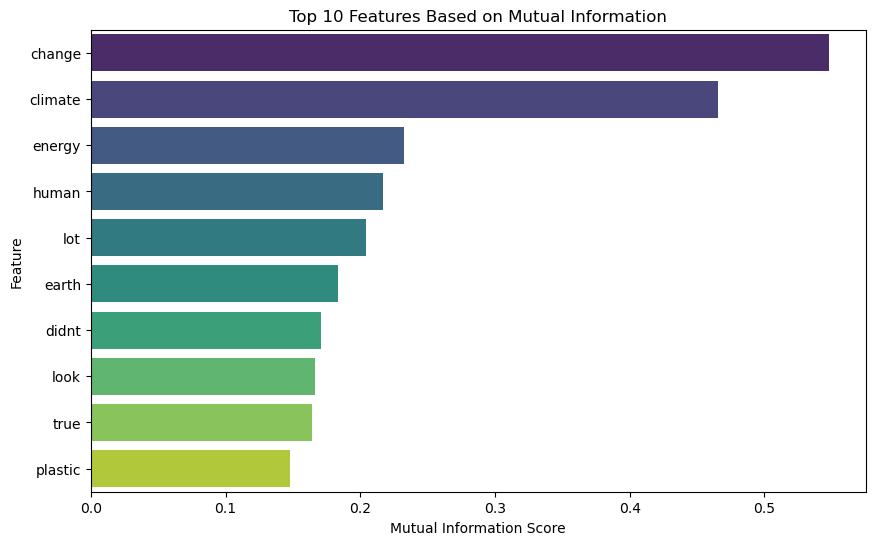

/var/folders/0m/dnl9zvc16c54thvr_c4qqrt40000gn/T/ipykernel_5261/328846329.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature', y='mutual_info', data=mutual_info_df.head(10), palette='viridis')


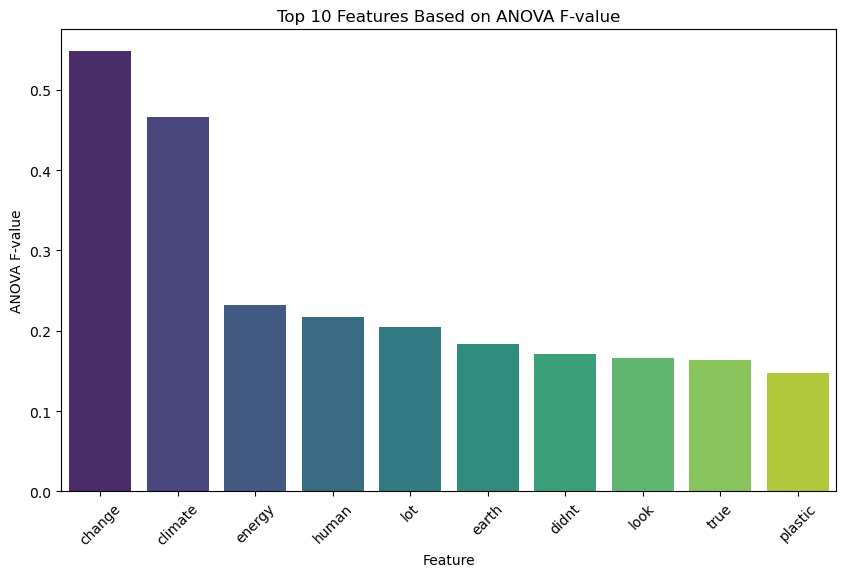

/var/folders/0m/dnl9zvc16c54thvr_c4qqrt40000gn/T/ipykernel_5261/328846329.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=data, palette='viridis')


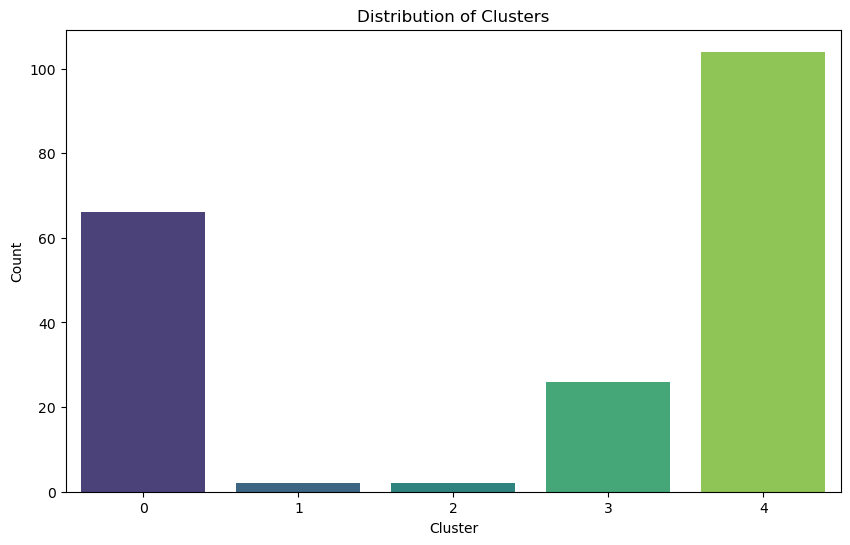

In [4]:
data = pd.read_csv('data/climate_change_and_conservative_subreddit_comments_vectorized.csv')

## Lets cluster the data
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = data.drop('label', axis=1)
y = data['label']
# Standardize the data
scaler = StandardScaler()
data_n = scaler.fit_transform(X)  # Exclude the last column (labels) for clustering
# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_pca)
# Get the cluster labels
labels = kmeans.labels_
# Add the labels to the original data
data = pd.DataFrame(data, columns=['feature1', 'feature2'])

data['cluster'] = labels
# Calculate silhouette score
silhouette_avg = silhouette_score(data_pca, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis', s=100)
plt.title('KMeans Clustering of Climate Change and Conservative Subreddit Comments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

print("PCA Variance Ration")
print(pca.explained_variance_ratio_)

## Identify the most important features for each cluster
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif

# Select the top 10 features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, labels)
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
# Get the selected feature names
selected_features = X.columns[selected_indices]
print("Top 10 features based on ANOVA F-value:")
print(selected_features)
# Calculate mutual information
mutual_info = mutual_info_classif(X, labels)
# Create a DataFrame to hold the feature names and their mutual information scores
mutual_info_df = pd.DataFrame({'feature': X.columns, 'mutual_info': mutual_info})
# Sort the DataFrame by mutual information scores
mutual_info_df = mutual_info_df.sort_values(by='mutual_info', ascending=False)
# Get the top 10 features based on mutual information
top_10_mutual_info = mutual_info_df.head(10)
print("Top 10 features based on mutual information:")
print(top_10_mutual_info)
# Visualize the top 10 features based on mutual information
plt.figure(figsize=(10, 6))
sns.barplot(x='mutual_info', y='feature', data=top_10_mutual_info, palette='viridis')
plt.title('Top 10 Features Based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.show()
# Visualize the top 10 features based on ANOVA F-value
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='mutual_info', data=mutual_info_df.head(10), palette='viridis')
plt.title('Top 10 Features Based on ANOVA F-value')
plt.xlabel('Feature')
plt.ylabel('ANOVA F-value')
plt.xticks(rotation=45)
plt.show()
# Visualize the distribution of the clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=data, palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
